# Exercise
<br>Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

<br>1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
<br>2.Plot bar charts showing impact of employee salaries on retention
<br>3.Plot bar charts showing corelation between department and employee retention
<br>4.Now build logistic regression model using variables that were narrowed down in step 1
<br>5.Measure the accuracy of the model

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv("HR_comma_sep.csv")

In [3]:
#1 = left
#0 = stayed
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

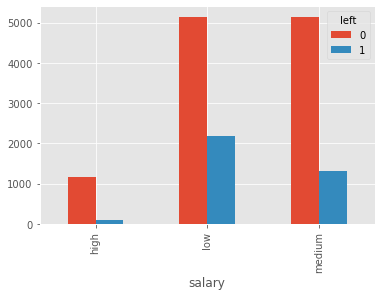

In [9]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

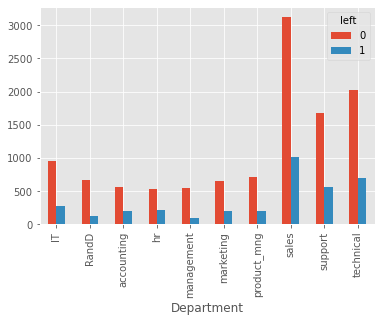

In [10]:
pd.crosstab(data.Department, data.left).plot(kind='bar')

In [57]:
new_data = data[['salary','satisfaction_level','average_montly_hours']]
new_data

,salary,satisfaction_level,average_montly_hours
0,low,0.38,157
1,medium,0.80,262
2,medium,0.11,272
3,low,0.72,223
4,low,0.37,159
...,...,...,...
14994,low,0.40,151
14995,low,0.37,160
14996,low,0.37,143
14997,low,0.11,280


In [58]:
int_salary = pd.get_dummies(new_data.salary, prefix='salary')
new_new_data = pd.concat([new_data, int_salary], axis='columns')
new_new_data.drop('salary', axis='columns', inplace=True)
new_new_data

,satisfaction_level,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(new_new_data,data.left,test_size=0.2)

In [60]:
X_test

,satisfaction_level,average_montly_hours,salary_high,salary_low,salary_medium
5247,0.50,175,1,0,0
2441,0.22,261,0,0,1
12731,0.79,232,0,0,1
7234,0.49,141,0,1,0
8028,0.50,272,0,0,1
...,...,...,...,...,...
4518,0.53,231,0,1,0
12981,0.72,175,1,0,0
10850,0.97,248,0,1,0
8891,0.94,261,0,0,1


In [61]:
y_test

5247     0
2441     0
12731    1
7234     0
8028     0
        ..
4518     0
12981    0
10850    0
8891     0
8826     0
Name: left, Length: 3000, dtype: int64

In [62]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [72]:
model.predict(X_test)
print('Accuracy: ', model.score(X_test,y_test))

Accuracy:  0.7883333333333333


In [68]:
model_lin = LinearRegression()
model_lin.fit(X_train,y_train)

LinearRegression()

In [73]:
model_lin.predict(X_test)
print('Accuracy: ', model_lin.score(X_test, y_test))

Accuracy:  0.1889251086951541
